### TITANIC 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# .shape nos da el número de filas y columnas

df.shape

(891, 12)

In [5]:
# .describe() nos da un DataFrame con la información estadística de las columnas

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# .info() nos da el tipo de variables de cada columna y si hay algun valor NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Numero de NaN's

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Porcentaje de NaN's en cada columna

df.isna().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

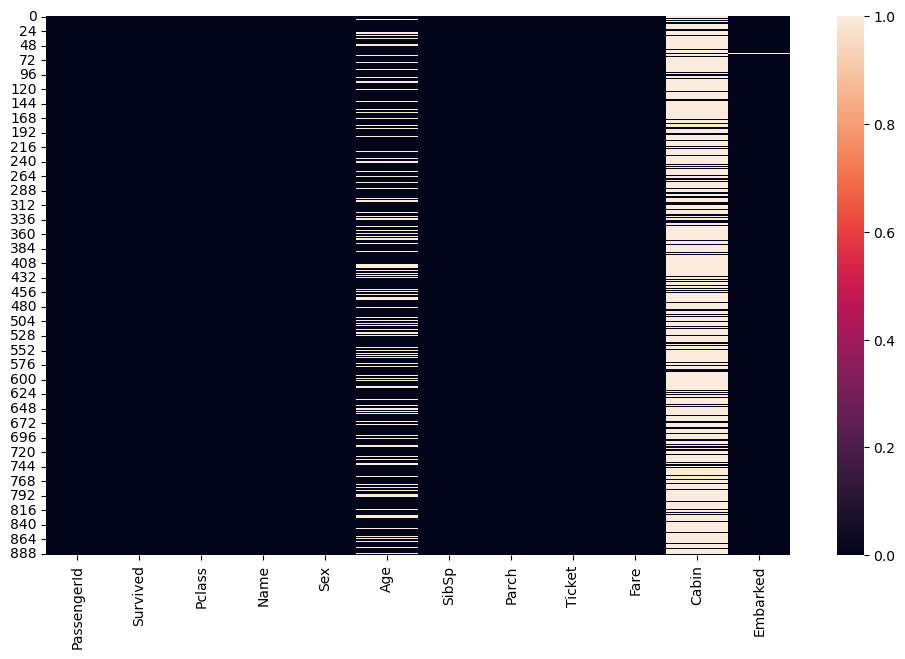

In [9]:
# Visualización de NaN's

plt.figure(figsize = (12, 7))

sns.heatmap(df.isna())
plt.show()

In [10]:
# Columna "PassengerId"

# En ejemplo la columna "PassengerId" debería tener valores únicos, uno para cada pasajero.
# Por lo general este tipo de columnas no aportan información porque es una columna categórica 
# y todos los valores son distintos.

# Su único uso es para identificar o filtrar filas.

df["PassengerId"].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [11]:
# Número de elemento únicos igual al número de filas

df["PassengerId"].nunique() == len(df)

# Podemos eliminar esta columna, lo haremos más adelante

True

In [12]:
# Columna "Name"

# En este DataFrame la columna "Name" cumple el mismo proposito que la columna "PassemgerId"
# Podemos verificar que cada fila tiene un valor único.

df["Name"].nunique() == len(df)

True

In [13]:
# De esta columna podemos sacar información como el apellido o el sexo de cada persona.
# Ya tenemos una columna que sexo ("Sex") que no tiene NaN's.

# Extraer apellidos

df["Surname"] = df["Name"].apply(lambda x : x.split(",")[0])

df.head(3)

# La columna "Name" también la podemos eliminar, lo haremos más adelante

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen


In [14]:
# Columna "Sex"

# Columna de categoria o categorica.

# Para este tipo de columna en el que sabemos los posibles valores que puede contener
# debemos verificar que todos los valores tienen el mismo formato o si existe algun valor atípico/erroneo.

# Ya sabemos que esta columna no tienen NaN's.

df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

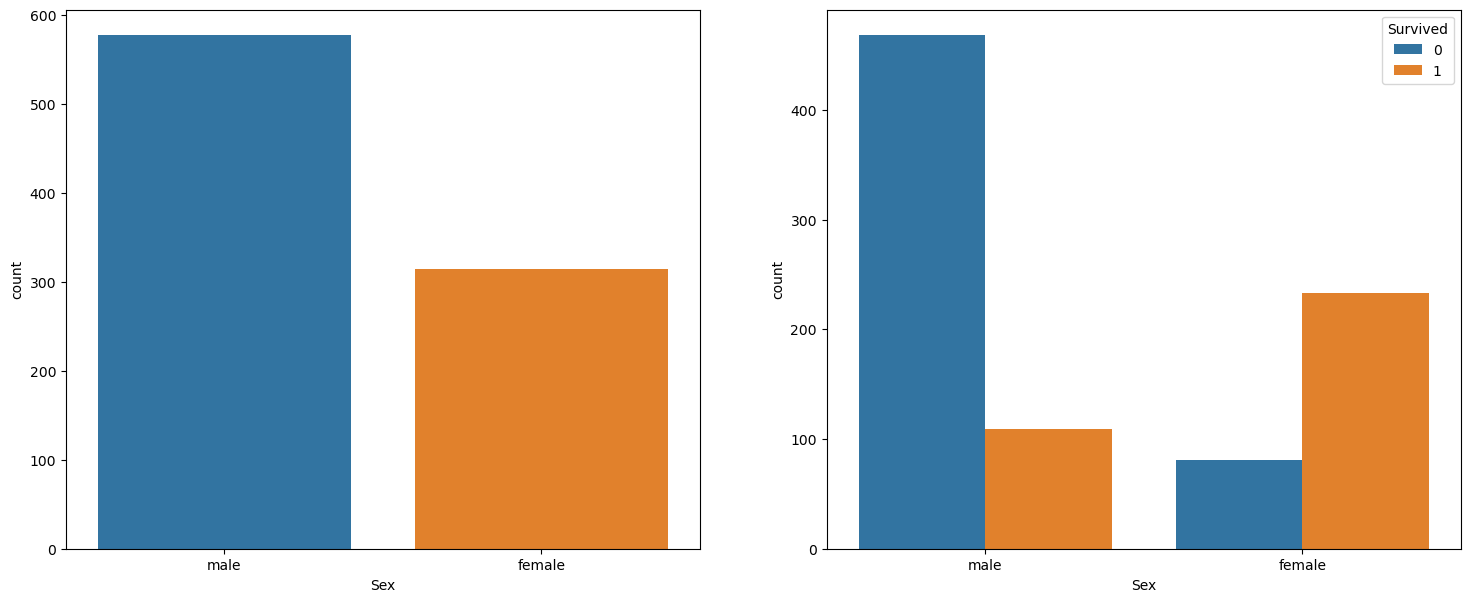

In [15]:
# Relación de la columna "Sex" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Sex"], ax = axes[0]);
sns.countplot(x = df["Sex"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Veamos como es la columna

df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [18]:
# pd.get_dummies()

pd.get_dummies(data = df["Sex"], prefix = "Sex")

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
# LabelEncoder()

from sklearn.preprocessing import LabelEncoder

# Inicializamos un objeto LabelEncoder()
sex_encoder = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
sex_encoder.fit(df["Sex"].values)

# Transformamos la columna
sex_encoder.transform(df["Sex"].values)

# El resultado de esta transformación es un array de 0s y 1s
# Podemos igualar la columna a este array

#df["Sex"] = sex_encoder.transform(df["Sex"].values)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [21]:
# .classes_ muestra los nombres originales de las categorias.

sex_encoder.classes_

array(['female', 'male'], dtype=object)

In [22]:
# .inverse_transform() invierte la transformación a la categoria original.

sex_encoder.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [23]:
sex_column = pd.get_dummies(data = df["Sex"], prefix = "Sex", dtype = int, drop_first = True)

# Añadimos la columna al DataFrame usando pd.concat()

df = pd.concat(objs = [df, sex_column], axis = 1)

df.head(3)

# Ahora podemos eliminar la columna "Sex", lo haremos más adelante

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0


In [24]:
# Columna "Age"

# Esta es una de las columnas con NaN's.

df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

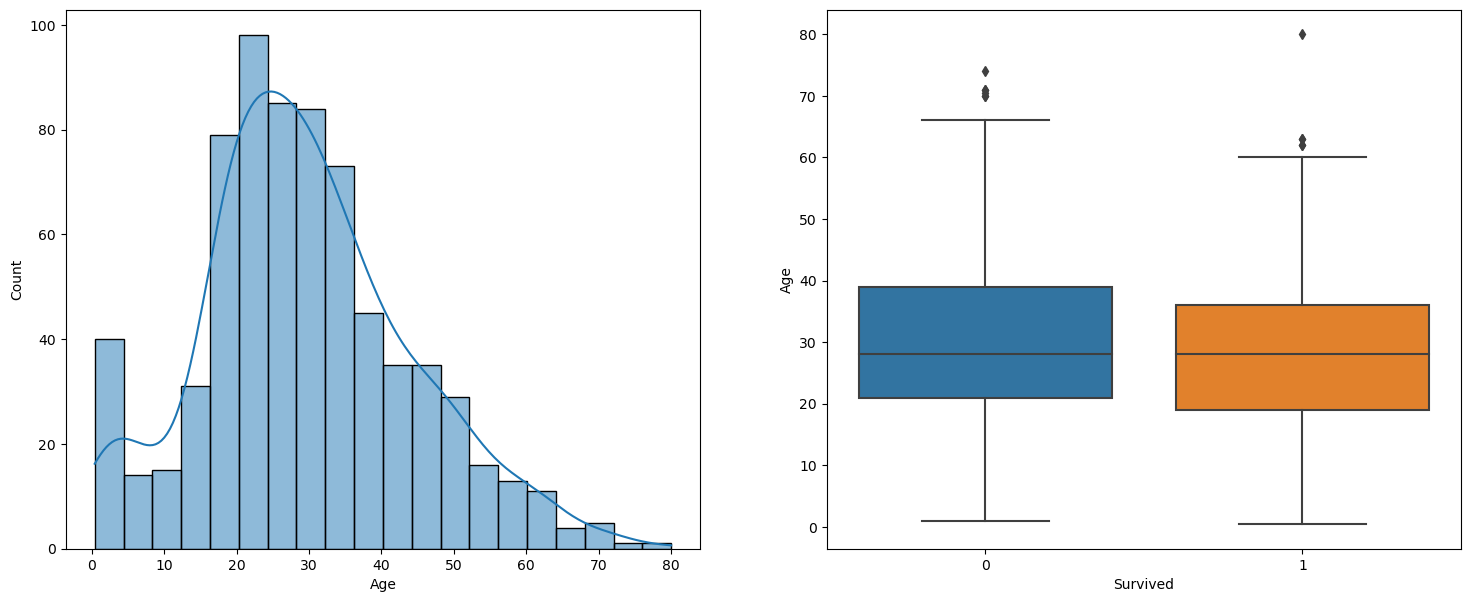

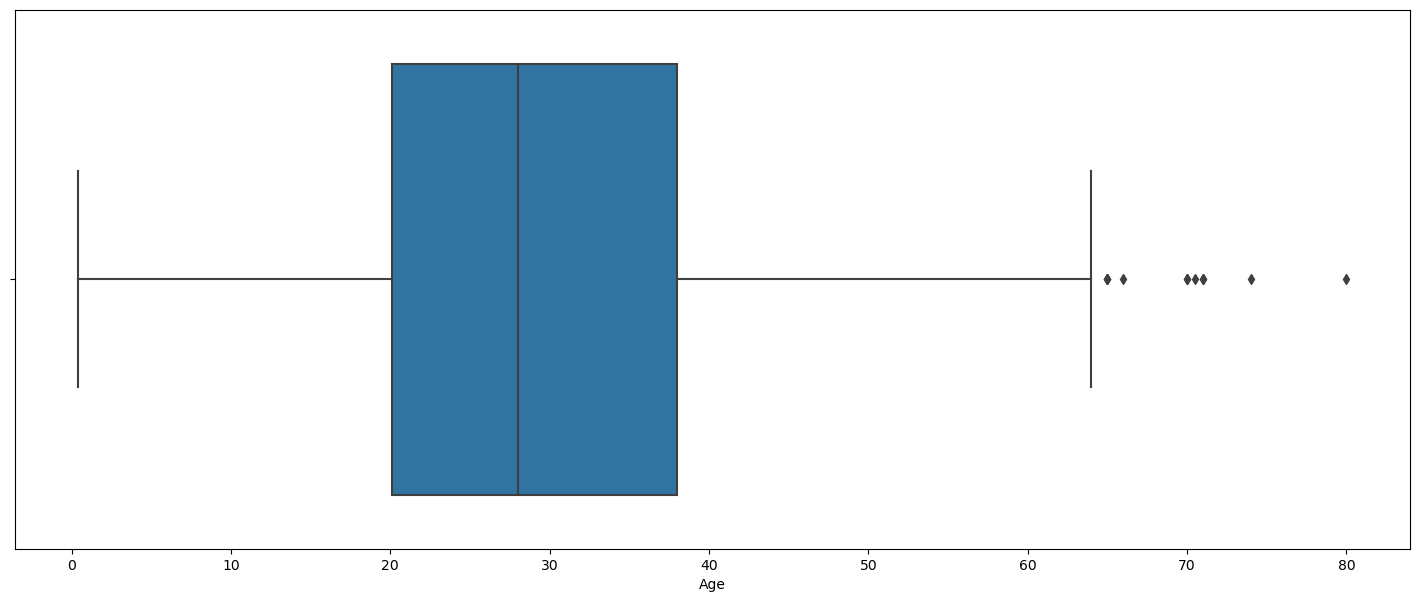

In [25]:
# Relación de la columna "Age" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Age"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Age"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Age"]);
plt.show()

In [26]:
# Calculo de cuartiles - Age

q1 = df["Age"].quantile(q = 0.25)  # Q1
q3 = df["Age"].quantile(q = 0.75)  # Q3

# Rango intercuartil (IQR)
iqr = q3 - q1

# Calcular los limites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"IQR: [{limite_inferior}, {limite_superior}]")

print(f"df antes: {df.shape}")

df = df[df["Age"].between(limite_inferior, limite_superior) | (df['Age'].isna())]

print(f"df después: {df.shape}")

IQR: [-6.6875, 64.8125]
df antes: (891, 14)
df después: (880, 14)


In [27]:
df['Age'].isna().sum()

177

In [28]:
df['Age'].isna().mean()

0.20113636363636364

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1


In [30]:
# Para la imputación de los datos vamos a "llenar" los NaN's por la media de edad

df["Age"].fillna(df["Age"].mean())

# En este ejemplo llena TODOS los NaN's por la misma media.
# No es in-place

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.072077
889    26.000000
890    32.000000
Name: Age, Length: 880, dtype: float64

In [31]:
# Columna "Pclass"

# Columna categórica, ya está en valores numéricos y no tiene NaN's.

df["Pclass"].value_counts()

3    488
1    210
2    182
Name: Pclass, dtype: int64

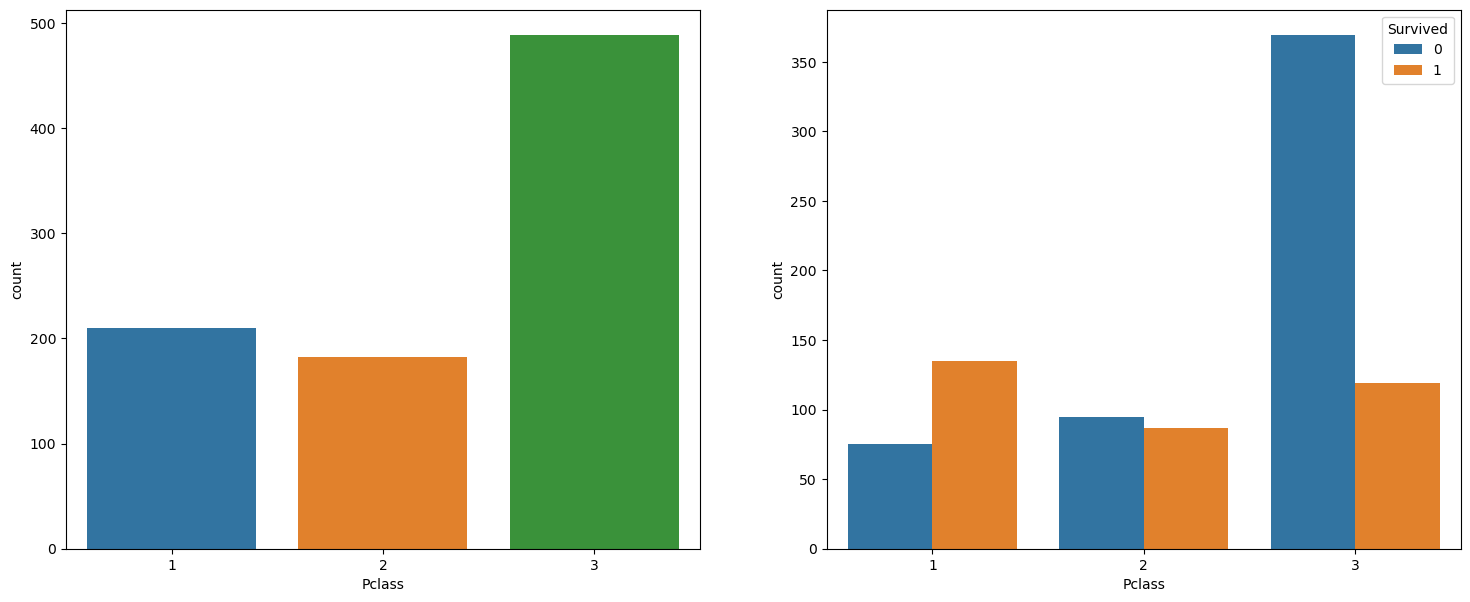

In [32]:
# Relación de la columna "Pclass" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Pclass"], ax = axes[0]);
sns.countplot(x = df["Pclass"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [33]:

# Variable categórica con muchos elementos diferentes (534 valores únicos)
# Probablemente no aporte mucha información el número de ticket

# Vamos a usar .value_counts().to_dict() para transformar esta columna a numérica sustituyendo
# su valor por el número de veces que se repite.

df["Ticket"].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
226593      1
9234        1
19988       1
2693        1
370376      1
Name: Ticket, Length: 671, dtype: int64

In [34]:
df["Ticket"].nunique()

671

In [35]:
len(df)

880

In [36]:
# Map
ticket_map = df["Ticket"].value_counts().to_dict()

# Transformación
df["Ticket"] = df["Ticket"].map(ticket_map)

df["Ticket"]

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket, Length: 880, dtype: int64

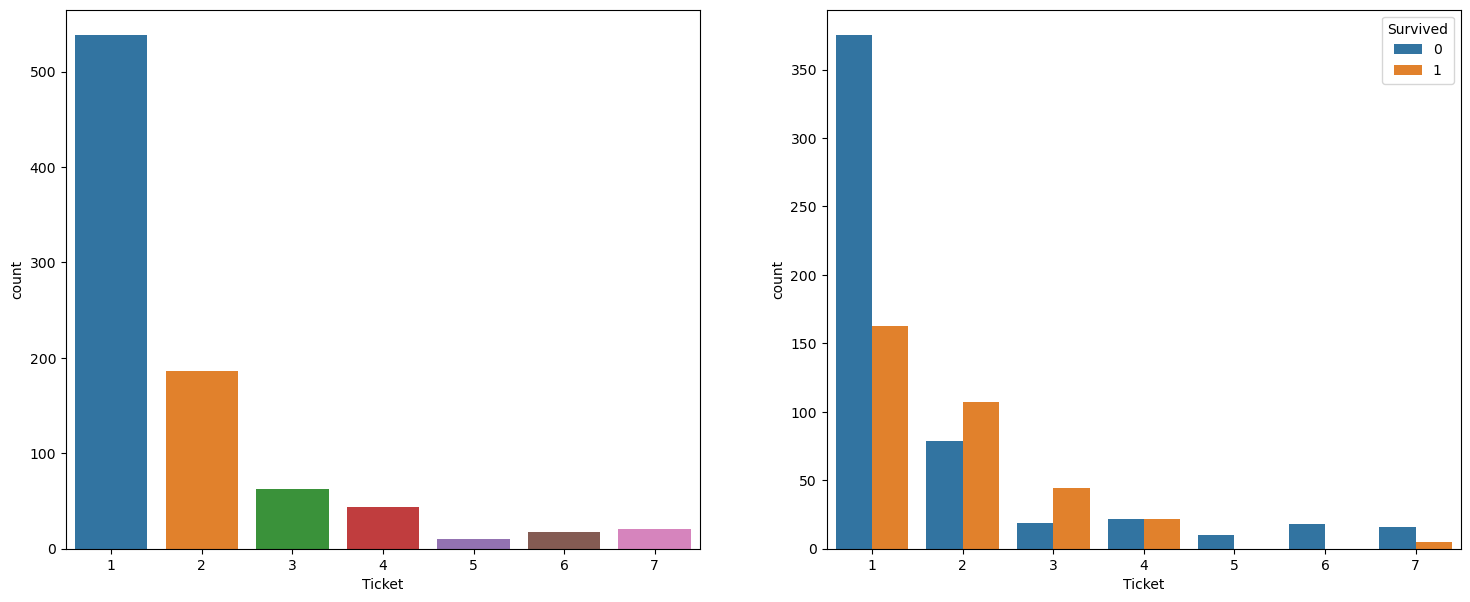

In [37]:
# Relación de la columna "Ticket" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Ticket"], ax = axes[0]);
sns.countplot(x = df["Ticket"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [38]:
# Columna "Fare"

# Precio del ticket, ya es una columna numérica y no tiene NaN's.

df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 880, dtype: float64

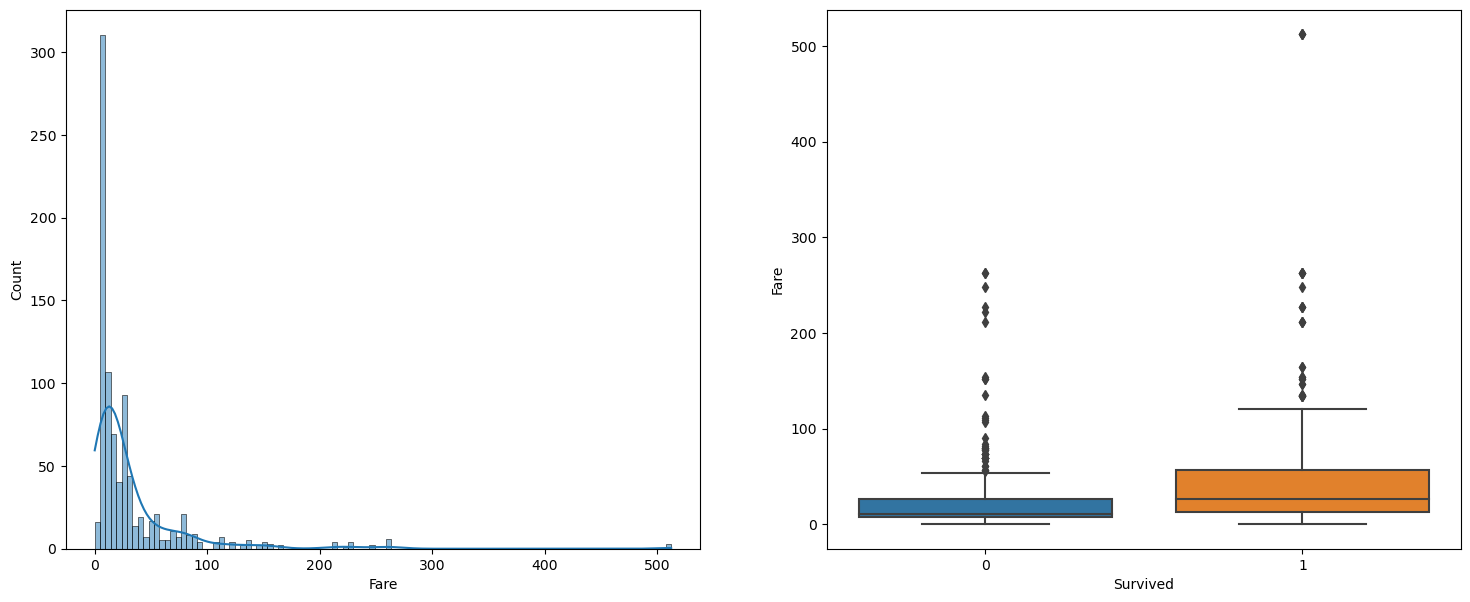

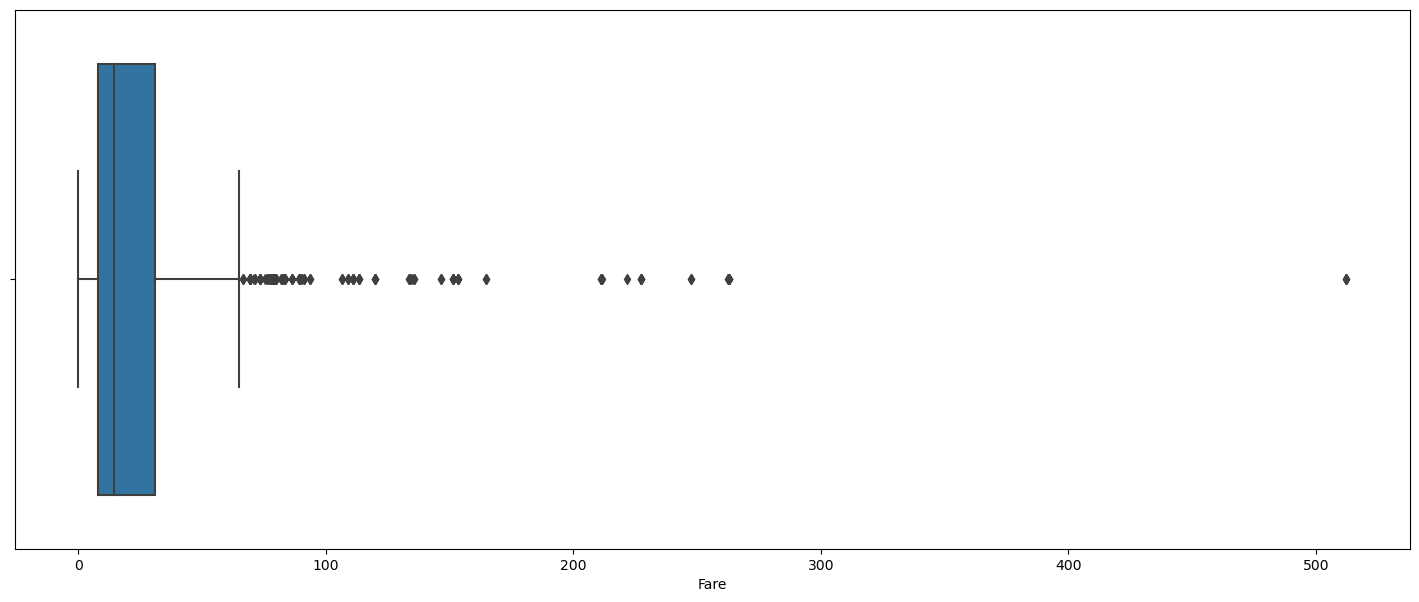

In [39]:
# Relación de la columna "Fare" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Fare"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Fare"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Fare"]);
plt.show()

In [40]:
# Transformación Logarítmica

df["Log_Fare"] = df["Fare"].apply(lambda x : np.log(x + 1))

# Aplicamos np.log(x + 1) para evitar log(0)

df["Log_Fare"]

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Log_Fare, Length: 880, dtype: float64

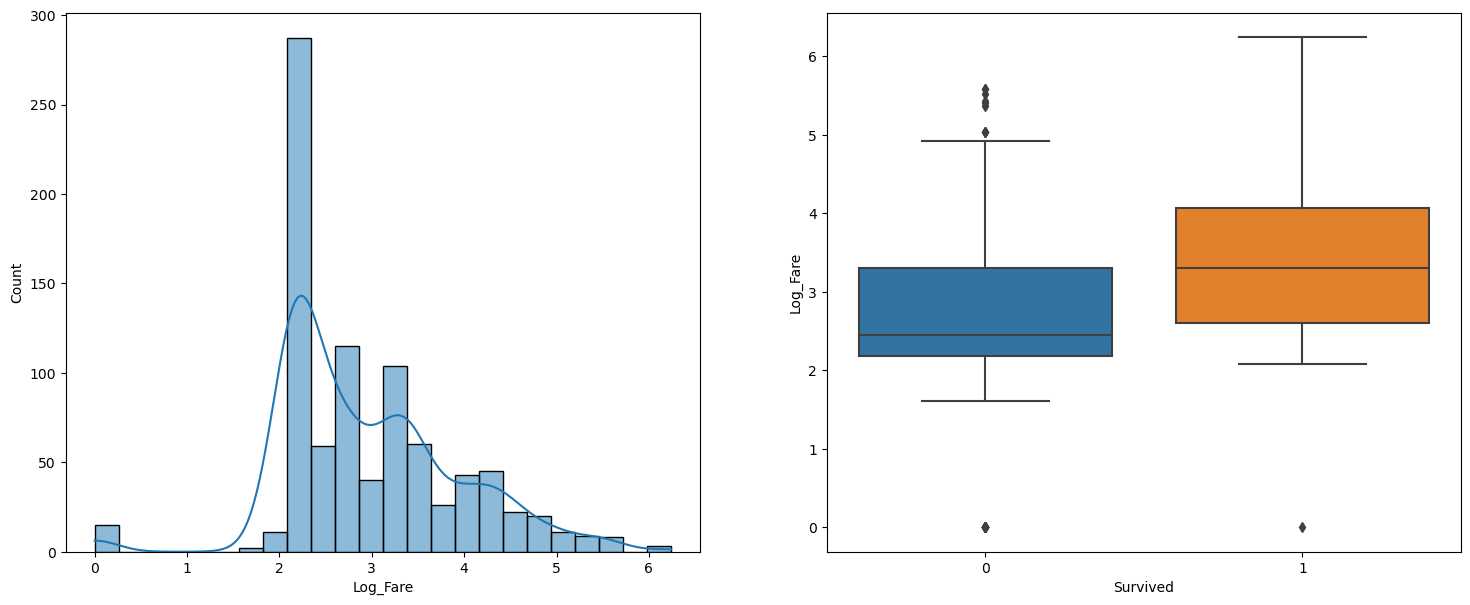

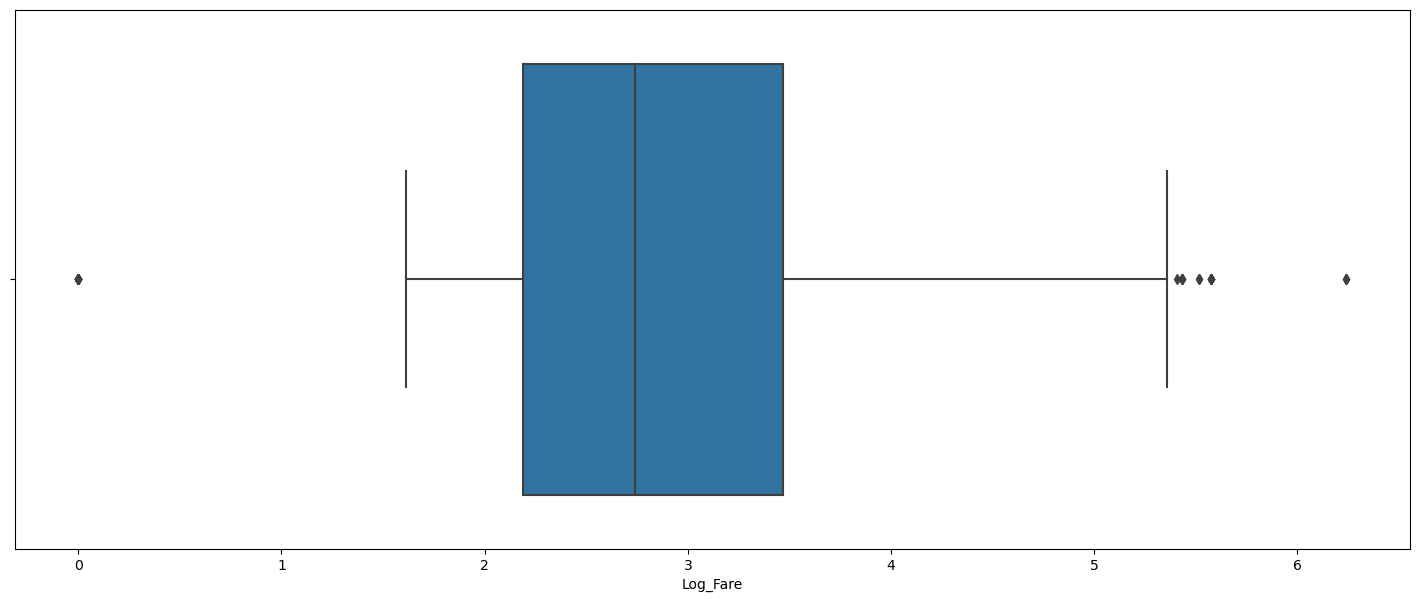

In [41]:
# Relación de la columna "Log_Fare" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Log_Fare"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Log_Fare"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Log_Fare"]);
plt.show()

# Nota: También podemos aplicar el IQR a esta transformación para eliminar outliers

In [42]:
# Columna "Sibsp"

# Columna categórica, ya es numérica y no tiene NaN's.

df["SibSp"].sort_values().value_counts(sort = False)

0    598
1    208
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

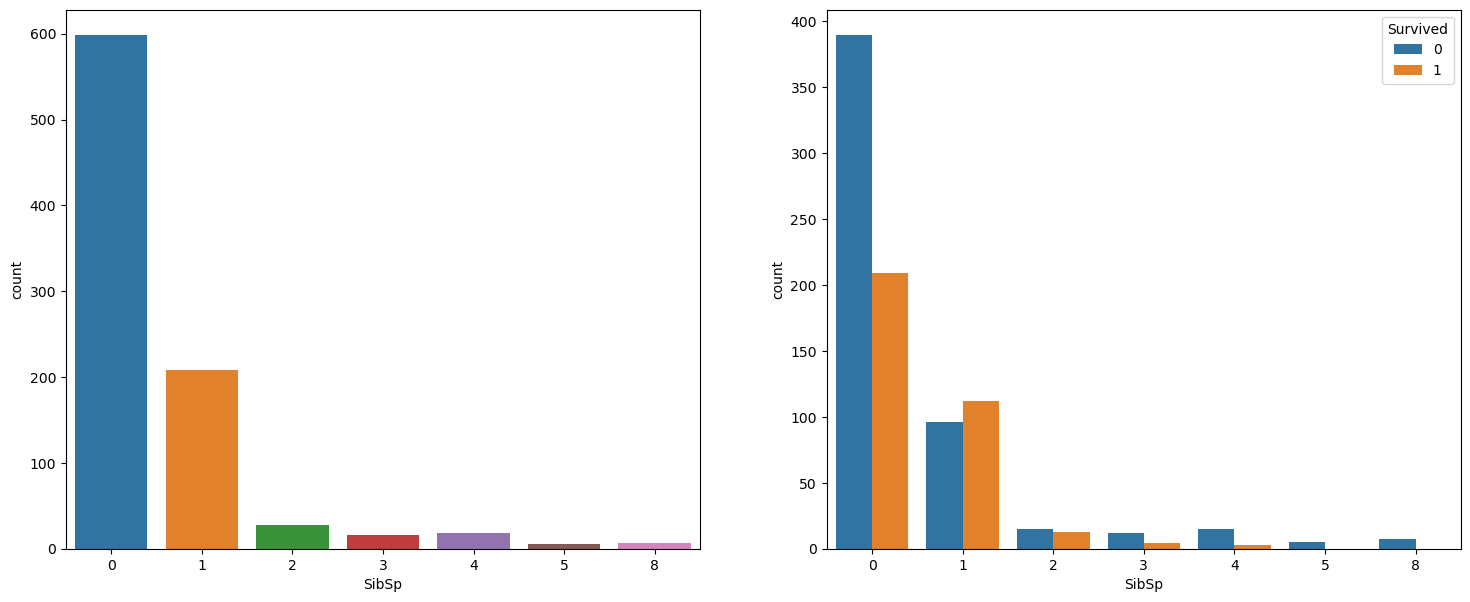

In [43]:
# Relación de la columna "Sibsp" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["SibSp"], ax = axes[0]);
sns.countplot(x = df["SibSp"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [44]:
# Columna "Parch"

# Columna categórica, ya es numérica y no tiene NaN's

df["Parch"].sort_values().value_counts(sort = False)

0    669
1    116
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

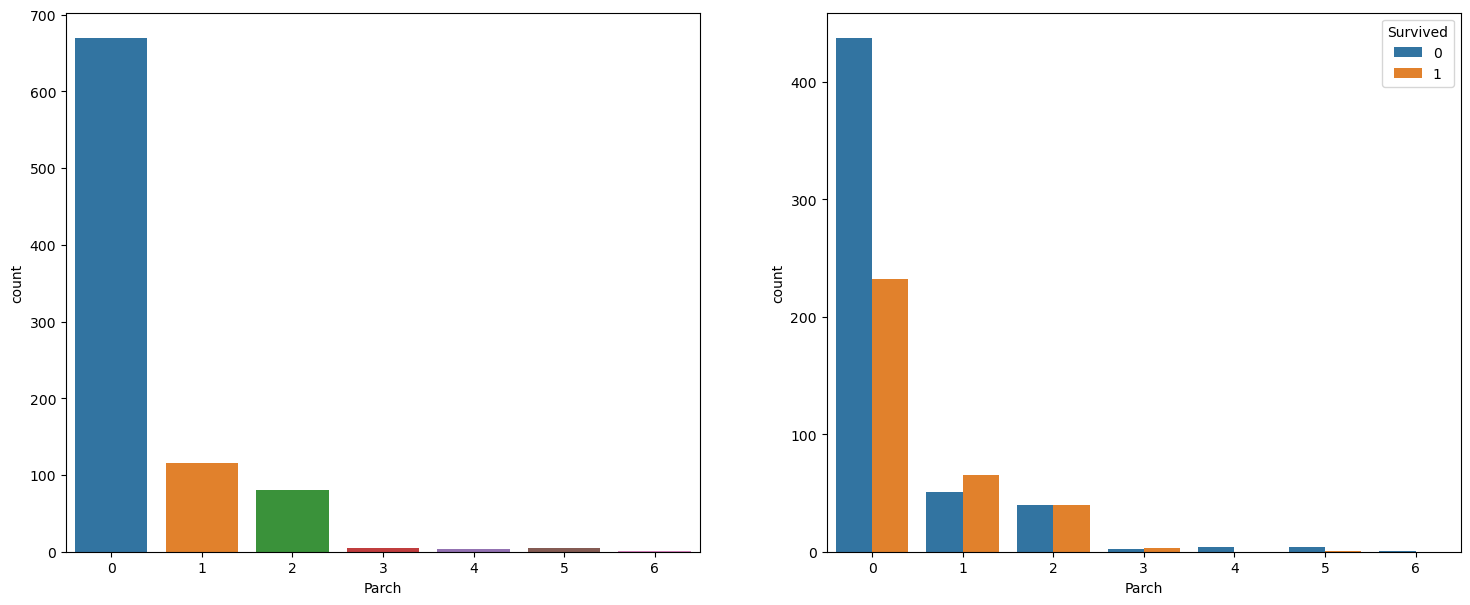

In [45]:
# Relación de la columna "Parch" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Parch"], ax = axes[0]);
sns.countplot(x = df["Parch"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [46]:
# Columna "Survived"

# Esta es la columna que queremos predecir
# En este caso estamos haciendo una clasificación, por lo que esta columna debe tener valores enteros

df["Survived"].value_counts()

0    539
1    341
Name: Survived, dtype: int64

In [51]:
df['Cabin_area'] = df['Cabin'].str.get(0)

In [52]:
df['Cabin_area'].value_counts()

C    59
B    45
D    33
E    31
A    13
F    13
G     4
T     1
Name: Cabin_area, dtype: int64

In [53]:
cabin_area = pd.get_dummies(data = df["Cabin_area"], prefix = "Cabin", dtype = int)

df = pd.concat([df, cabin_area], axis = 1)

In [54]:
df = df.iloc[:, :-2]

In [56]:
# Por último vamos a eliminar las columnas que no hagan falta

# Decidimos eliminar "Fare" y quedarnos con "Log_Fare"

df.drop([ "Cabin", "Cabin_area"], axis = 1, inplace = True)


In [50]:
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Cabin,Sex_male,Log_Fare
0,0,3,22.0,1,0,1,NaN,1,2.110213
1,1,1,38.0,1,0,1,C85,0,4.280593
2,1,3,26.0,0,0,1,NaN,0,2.188856
3,1,1,35.0,1,0,2,C123,0,3.990834
4,0,3,35.0,0,0,1,NaN,1,2.202765
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,NaN,1,2.639057
887,1,1,19.0,0,0,1,B42,0,3.433987
888,0,3,NaN,1,2,2,NaN,0,3.196630
889,1,1,26.0,0,0,1,C148,1,3.433987


In [57]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Sex_male      int64
Log_Fare    float64
Cabin_A       int64
Cabin_B       int64
Cabin_C       int64
Cabin_D       int64
Cabin_E       int64
Cabin_F       int64
dtype: object

In [58]:
# Usaremos KNNImputer para llenar los NaN's de la columna Age

# Segunda técnica:

# Reemplaza los NaN's de la columna "Age" por la media de las edades de los k-vecinos mas cercanos (KNN).

from sklearn.impute import KNNImputer

# KNNImputer recibe un DataFrame que solo contenga números

# Inicializamos el objeto Imputer
imputer = KNNImputer(n_neighbors = 3)

# Entrenamos el Imputer y transformamos el DataFrame
imputed = imputer.fit_transform(df)

In [59]:
df.shape

(880, 14)

In [60]:
imputed.shape

(880, 14)

In [61]:
df = pd.DataFrame(data    = imputed,
                  columns = df.columns)

In [62]:
# Resultado
df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Sex_male,Log_Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F
0,0.0,3.0,22.0,1.0,0.0,1.0,1.0,2.110213,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,1.0,0.0,2.188856,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,1.0,0.0,2.0,0.0,3.990834,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,1.0,1.0,2.202765,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.0,2.0,27.0,0.0,0.0,1.0,1.0,2.639057,0.0,0.0,0.0,0.0,0.0,0.0
876,1.0,1.0,19.0,0.0,0.0,1.0,0.0,3.433987,0.0,1.0,0.0,0.0,0.0,0.0
877,0.0,3.0,33.0,1.0,2.0,2.0,0.0,3.196630,0.0,0.0,0.0,0.0,0.0,0.0
878,1.0,1.0,26.0,0.0,0.0,1.0,1.0,3.433987,0.0,0.0,1.0,0.0,0.0,0.0


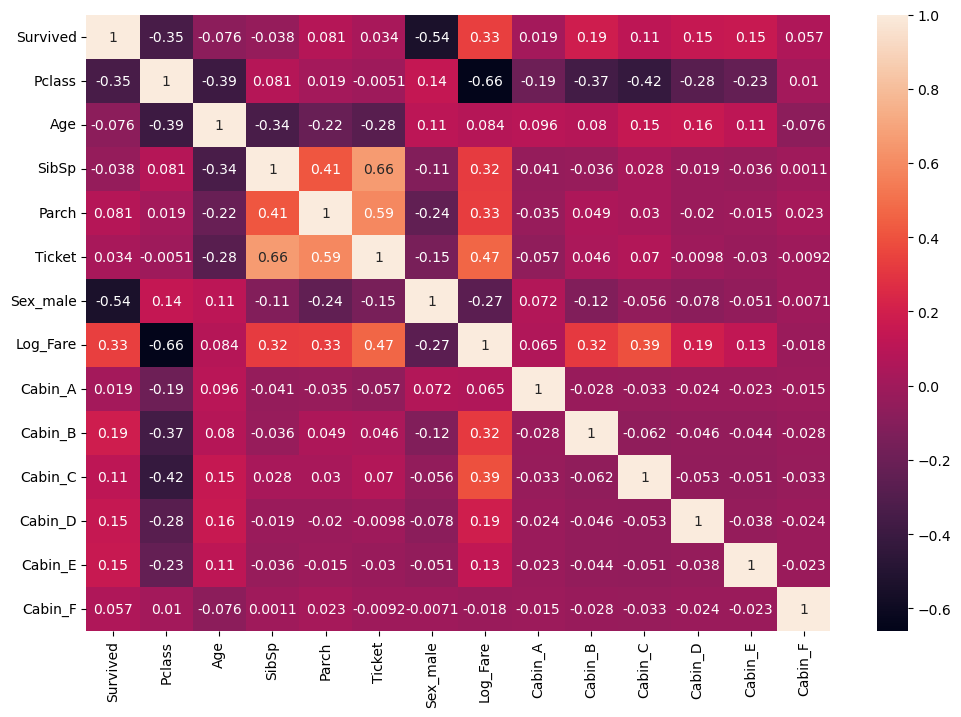

In [63]:
### Correlación

plt.figure(figsize = (12, 8))

sns.heatmap(df.corr(), annot = True)
plt.show()

In [64]:
# Guardamos en .csv

df.to_csv("Data/titanic_preprocesamiento.csv", index = False)

In [65]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (880, 13)
y: (880,)


Feature ranking:
1. feature 1 (0.26700393452088234): Pclass
2. feature 5 (0.2424363822689868): Age
3. feature 6 (0.22728490827026632): SibSp
4. feature 0 (0.07505841905040629): Parch
5. feature 4 (0.06050826874741569): Ticket
6. feature 2 (0.04230000862379004): Sex_male
7. feature 3 (0.03222277444020382): Log_Fare
8. feature 11 (0.015996916537077722): Cabin_A
9. feature 8 (0.012114413149151336): Cabin_B
10. feature 10 (0.010012306894805907): Cabin_C
11. feature 9 (0.007727858222788489): Cabin_D
12. feature 12 (0.003964798942956262): Cabin_E
13. feature 7 (0.0033690103312690838): Cabin_F


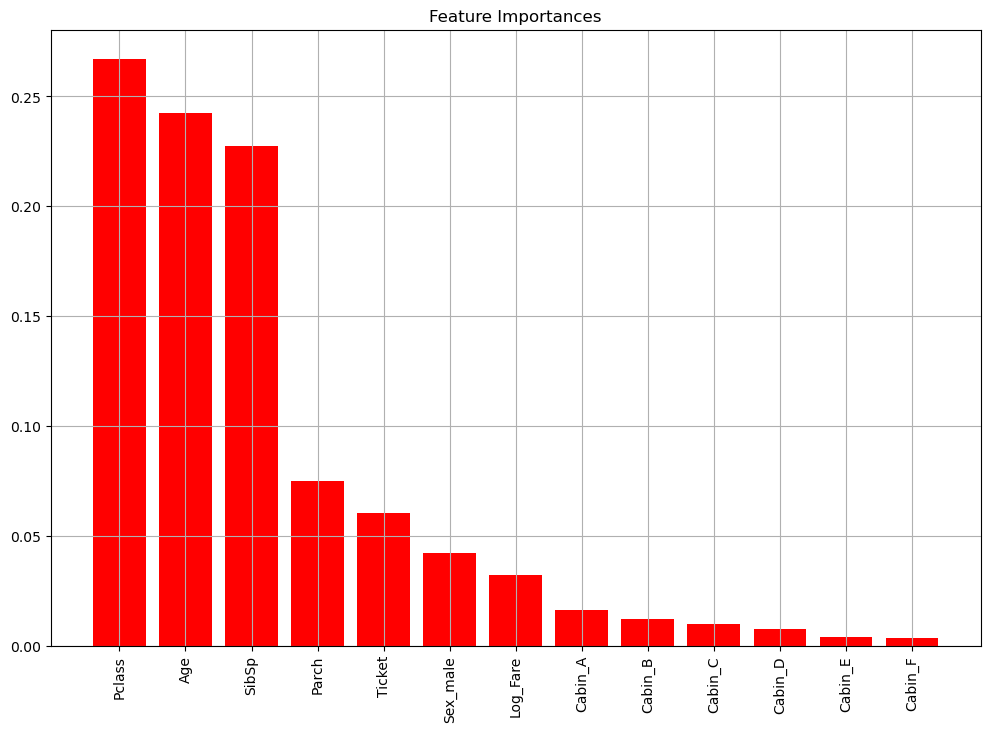

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestClassifier(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

columns_plot = list()

for f in range(X.shape[1]):
    
    feature = indices[f]
    importancia = importances[indices[f]]
    column_name = X.columns[f]
    
    columns_plot.append(column_name)
    
    print(f"{f + 1}. feature {feature} ({importancia}): {column_name}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", align = "center")
plt.xticks(range(X.shape[1]), columns_plot, rotation = 90)

# plt.xlim([-1, X.shape[1]])
plt.grid()
plt.show()

### Conclusiones
Age y Pclass son las variables más determinantes para predecir correctamente.

El lugar de Embark es irrelevante.

Age no está correlacionada con Survived, aún así es la variable más importante en el Feature Selection.